## 8.1. Exercise: Probing Type I and Type II neuron models

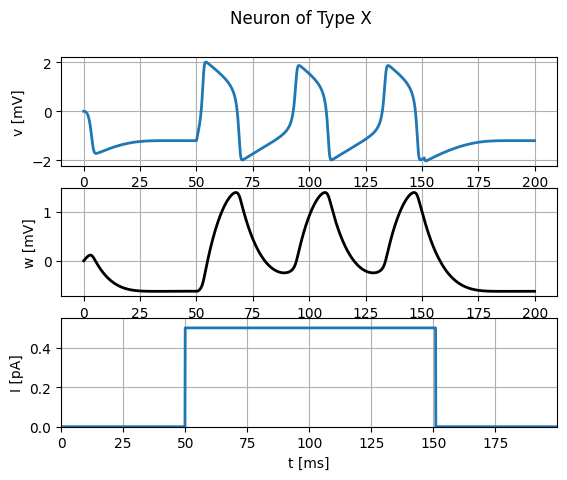

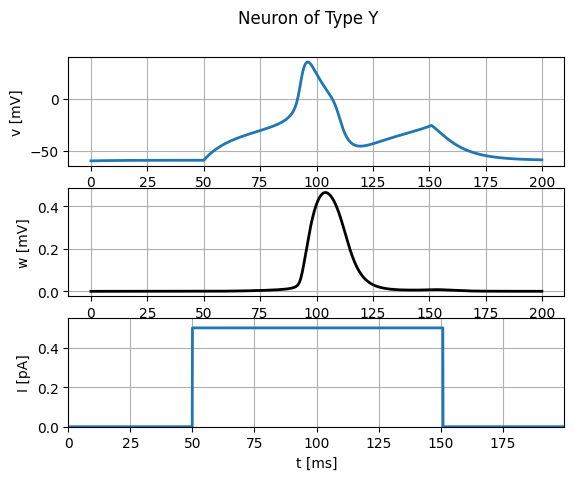

In [48]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

## 8.1.1. Question: Estimating the threshold
What is the threshold current for repetitive firing for NeuronX and NeuronY?

Exploring various values of I_amp, find the range in which the threshold occurs, to a precision of 0.01.

Plot the responses to step current which starts after 100ms (to let the system equilibrate) and lasting at least 1000ms (to detect repetitive firing with a long period). You can do this by modifying the code example given above. Make sure to check the documentation of the functions you use: input_factory.get_step_current(), neuron_type.neurons.run() and neuron_type.neurons.plot_data().

Already from the voltage response near threshold you might have an idea which is type I or II, but let’s investigate further.

In [30]:
spike_threshold= 1*b2.mV # it's a Quantity 0-2?  -50

#input_factory.get_step_current(100, 110, 1*b2.ms, 0.5*b2.pA)  1000*b2.ms
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, 0.5*b2.pA)
# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX() 
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 1200*b2.ms)
spike_times = spike_tools.get_spike_time(state_monitor,spike_threshold)
print(spike_times)
print(type(spike_times))  # it's a Quantity

spike_tools.pretty_print_spike_train_stats(state_monitor,spike_threshold)

[0.1028 0.144  0.1835 0.223  0.2625 0.302  0.3415 0.381  0.4205 0.46
 0.4995 0.539  0.5785 0.618  0.6575 0.6969 0.7364 0.7759 0.8154 0.8549
 0.8944 0.9339 0.9734 1.0129 1.0524 1.0919] s
<class 'brian2.units.fundamentalunits.Quantity'>
nr of spikes: 26
mean ISI: 39.564 ms
ISI variance: 0.111904 ms^2
spike freq: 25.27550298 Hz
spike times: too many values
ISI: too many values


(array([0.1028, 0.144 , 0.1835, 0.223 , 0.2625, 0.302 , 0.3415, 0.381 ,
        0.4205, 0.46  , 0.4995, 0.539 , 0.5785, 0.618 , 0.6575, 0.6969,
        0.7364, 0.7759, 0.8154, 0.8549, 0.8944, 0.9339, 0.9734, 1.0129,
        1.0524, 1.0919]) * second,
 array([41.2, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5,
        39.5, 39.5, 39.5, 39.4, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5,
        39.5, 39.5, 39.5]) * msecond,
 39.564 * msecond,
 25.27550298 * hertz,
 0.111904 * msecond2)

In [31]:
def get_firing_rate(neuron, input_current, spike_threshold=0*b2.mV):
    f=0
    # inject a test current into the neuron and call it's run() function.
    a_neuron_of_type_X = neurons.NeuronX() 
    state_monitor = a_neuron_of_type_X.run(input_current,1200*b2.ms)
    # get the spike times using spike_tools.get_spike_times
    st = spike_tools.get_spike_time(state_monitor,spike_threshold)
    print(st)
    # from the spike times, calculate the firing rate f
    isi = st[1:]-st[:-1]
    if len(isi) >0:
        f=1/np.mean(isi)
    return f

spike_firing_rate = get_firing_rate(a_neuron_of_type_X, input_current, spike_threshold)
print(spike_firing_rate)

[0.1028 0.144  0.1835 0.223  0.2625 0.302  0.3415 0.381  0.4205 0.46
 0.4995 0.539  0.5785 0.618  0.6575 0.6969 0.7364 0.7759 0.8154 0.8549
 0.8944 0.9339 0.9734 1.0129 1.0524 1.0919] s
25.27550298 Hz


a_neuron_of_type_X is : Type II
[1.3] ms
[ 1.3 40.  79.5] ms
[  1.3  40.   79.5 119.  158.5 198. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.9] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.5 751.  790.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.5 751.  790.5 830.  869.5 909. ] ms
[0.0013 0.04   0.0795 0.119  0.1585 0.198  0.2375 0.277  0.3165 0.356
 0.3955 0.435  0.4745 0.514  0.5535 0.593  0.6325 0.672  0.7115 0.751
 0.7905 0.83   0.8695 0.909  0.9485 0.988 ] s


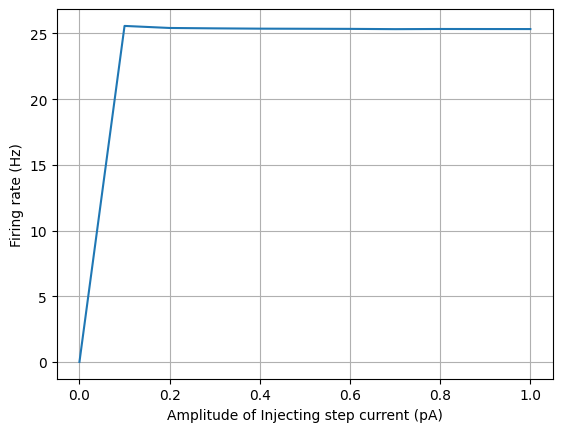

a_neuron_of_type_Y is : Type I
[1.3] ms
[ 1.3 40.  79.5] ms
[  1.3  40.   79.5 119.  158.5 198. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593. ] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.9] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.5 751.  790.5] ms
[  1.3  40.   79.5 119.  158.5 198.  237.5 277.  316.5 356.  395.5 435.
 474.5 514.  553.5 593.  632.5 672.  711.5 751.  790.5 830.  869.5 909. ] ms
[0.0013 0.04   0.0795 0.119  0.1585 0.198  0.2375 0.277  0.3165 0.356
 0.3955 0.435  0.4745 0.514  0.5535 0.593  0.6325 0.672  0.7115 0.751
 0.7905 0.83   0.8695 0.909  0.9485 0.988 ] s


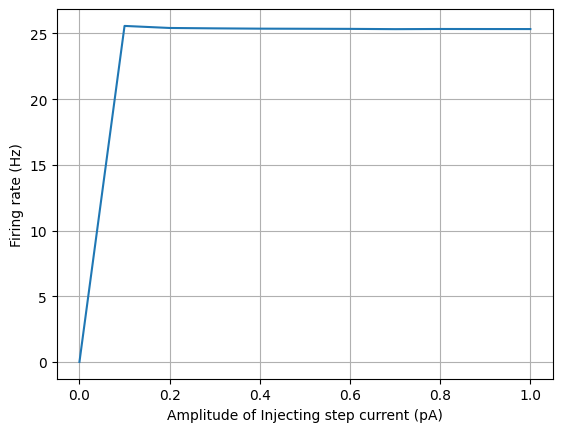

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fI_curve(Neuron):#NeuronClass

    plt.figure()  # new figure

    #neuron = NeuronClass()  # instantiate the neuron class
    if Neuron == a_neuron_of_type_X:
        neuron = neurons.NeuronX()
    elif Neuron == a_neuron_of_type_Y:
        neuron = neurons.NeuronX()
        

    I = np.arange(0.0,1.1,0.1)  # a range of current inputs
    f = []

    # loop over current values
    for I_amp in I:

        input_current = input_factory.get_step_current(0, int((I_amp+0.01)*1000), 1.*b2.ms, 0.5*b2.pA)
        firing_rate = get_firing_rate(neuron, input_current, spike_threshold=1*b2.mV)
        f.append(firing_rate)
        
    #
    #firing_rate = get_firing_rate(neuron, input_current, spike_threshold=1*b2.mV)

    plt.plot(I, f)
    #plt.plot(input_current, firing_rate)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
plot_fI_curve(a_neuron_of_type_X)
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))
plot_fI_curve(a_neuron_of_type_Y)